<a href="https://colab.research.google.com/github/kavinraam/black-friday-sales-forecasting/blob/main/Black_Friday_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383980 entries, 0 to 383979
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     383980 non-null  int64  
 1   Product_ID                  383980 non-null  object 
 2   Gender                      383980 non-null  object 
 3   Age                         383980 non-null  object 
 4   Occupation                  383980 non-null  int64  
 5   City_Category               383980 non-null  object 
 6   Stay_In_Current_City_Years  383979 non-null  object 
 7   Marital_Status              383979 non-null  float64
 8   Product_Category_1          383979 non-null  float64
 9   Product_Category_2          264893 non-null  float64
 10  Product_Category_3          117520 non-null  float64
 11  Purchase                    383979 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 35.2+ MB


In [ ]:
print(df.isnull().sum())

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            119087
Product_Category_3            266460
Purchase                           1
dtype: int64


In [ ]:
df.fillna(-1, inplace=True)

In [ ]:
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [ ]:
df["Gender"] = df["Gender"].map({"M": 1, "F": 0})

In [ ]:
df["City_Category"] = df["City_Category"].map({"A": 0, "B": 1, "C": 2})

In [ ]:
age_mapping = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
df["Age"] = df["Age"].map(age_mapping)

In [ ]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace("4+", 4).astype(int)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0.0,3.0,-1.0,-1.0,8370.0
1,1000001,P00248942,0,0,10,0,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,0,2,0.0,12.0,-1.0,-1.0,1422.0
3,1000001,P00085442,0,0,10,0,2,0.0,12.0,14.0,-1.0,1057.0
4,1000002,P00285442,1,6,16,2,4,0.0,8.0,-1.0,-1.0,7969.0


In [ ]:
df["Customer_Loyalty_Score"] = df.groupby("User_ID")["Purchase"].transform("sum") / df.groupby("User_ID")["Product_ID"].transform("nunique")

In [ ]:
df["Product_Popularity_Index"] = df.groupby("Product_ID")["Purchase"].transform("sum")

In [ ]:
df["Total_Products_Bought"] = df.groupby("User_ID")["Product_ID"].transform("count")

In [ ]:
df.drop(["User_ID", "Product_ID"], axis=1, inplace=True)

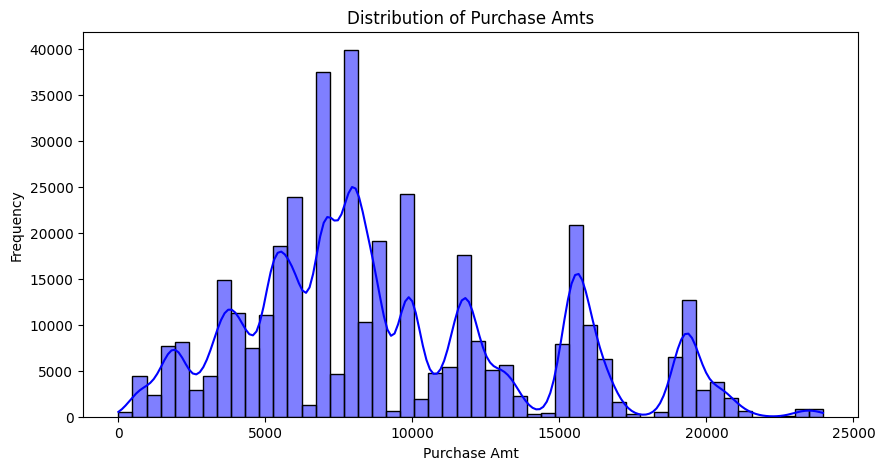

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Purchase"], bins=50, kde=True, color="blue")
plt.title("Distribution of Purchase Amts")
plt.xlabel("Purchase Amt")
plt.ylabel("Frequency")
plt.show()

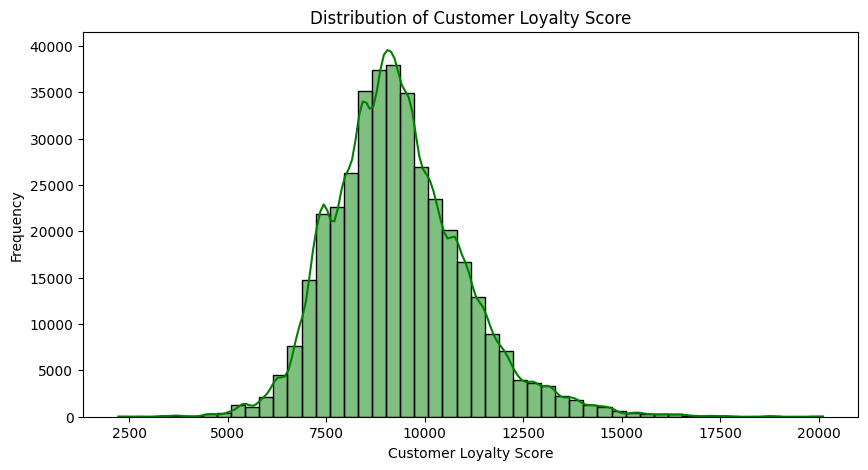

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Customer_Loyalty_Score"], bins=50, kde=True, color="green")
plt.title("Distribution of Customer Loyalty Score")
plt.xlabel("Customer Loyalty Score")
plt.ylabel("Frequency")
plt.show()

<ipython-input-19-bdcee78464ef>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age", y="Purchase", data=df, palette="coolwarm")


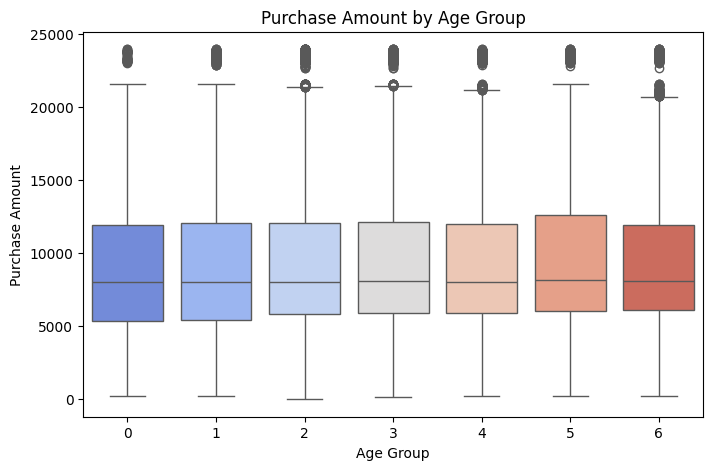

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Age", y="Purchase", data=df, palette="coolwarm")
plt.title("Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Purchase Amount")
plt.show()


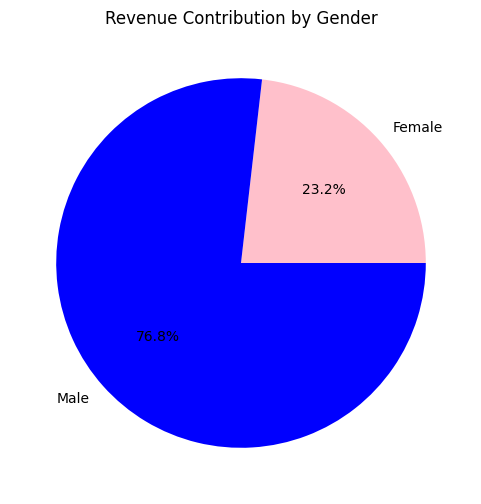

In [ ]:
gender_revenue = df.groupby("Gender")["Purchase"].sum().reset_index()

plt.figure(figsize=(6, 6))
plt.pie(gender_revenue["Purchase"], labels=["Female", "Male"], autopct="%1.1f%%", colors=["pink", "blue"])
plt.title("Revenue Contribution by Gender")
plt.show()

<ipython-input-21-fec2ce1f3b8a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="City_Category", y="Purchase", data=df, palette="Set2")


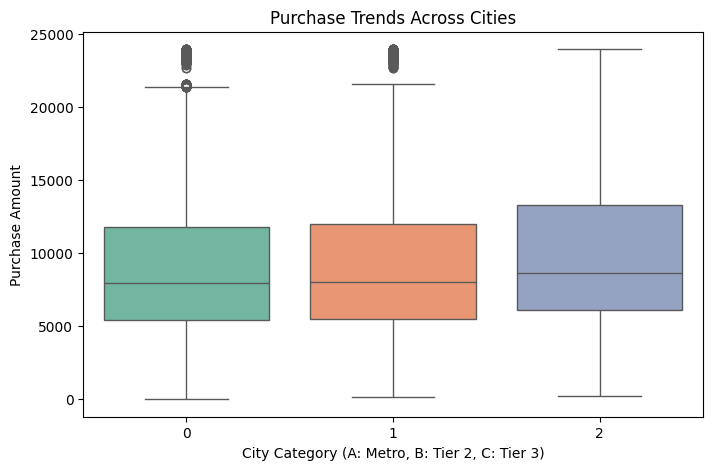

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="City_Category", y="Purchase", data=df, palette="Set2")
plt.title("Purchase Trends Across Cities")
plt.xlabel("City Category (A: Metro, B: Tier 2, C: Tier 3)")
plt.ylabel("Purchase Amount")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop("Purchase", axis=1)
y = df["Purchase"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = math.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R2 Score: {r2_lr:.4f}")


Linear Regression Performance:
MAE: 2959.9453
RMSE: 3889.1440
R2 Score: 0.3902


In [ ]:
import pandas as pd


comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lr
})


print(comparison_df.tail(10))


         Actual     Predicted
209096   6033.0   5917.931109
44791   11961.0   9412.522603
298974  19008.0  11059.827371
257433   5258.0   5814.386634
348555  20158.0  10945.729336
301262   3677.0   6887.784883
168533   8822.0  11425.420344
243302  19155.0  15087.268346
73592   19175.0  15358.140413
254399   2078.0   7219.667331


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = math.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")


Random Forest Performance:
MAE: 1934.6645
RMSE: 2619.6267
R2 Score: 0.7234


In [ ]:
import pandas as pd


comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf
})


print(comparison_df.tail(10))


         Actual  Predicted
209096   6033.0    6850.37
44791   11961.0   13311.99
298974  19008.0   11624.30
257433   5258.0    5131.46
348555  20158.0   17456.87
301262   3677.0    3782.34
168533   8822.0    6903.43
243302  19155.0   16436.67
73592   19175.0   16767.92
254399   2078.0    6993.27


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = math.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Basic XGBoost Performance:")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R2 Score: {r2_xgb:.4f}")

Basic XGBoost Performance:
MAE: 1892.8309
RMSE: 2550.0058
R2 Score: 0.7379


In [ ]:
import pandas as pd


comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_xgb
})


print(comparison_df.tail(10))


         Actual     Predicted
209096   6033.0   7038.531738
44791   11961.0  12416.989258
298974  19008.0  12940.225586
257433   5258.0   4973.995605
348555  20158.0  16805.087891
301262   3677.0   6362.686523
168533   8822.0   7270.750000
243302  19155.0  16966.843750
73592   19175.0  16197.197266
254399   2078.0   7471.643066
